# **Home Work Assignment #10**
                                                                                
## ***Redshift Of A Star-Forming Galaxy: The Orion Nebula***

##### Author : Spencer Long  
##### Class: Astro 320 Spectroscopy

---
---
---

# Imports

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
from astropy.io import fits
from astropy import units as u

---
# Accessing Fits File Data

In [2]:
hdul = fits.open('/Users/Spencer/Desktop/Spectroscopy320/Spectra_Data/4.ELG.fits')

HIERARCHESO PRO CATG = 'MOS_SCIENCE_REDUCED' / Category of pipeline product      [astropy.io.fits.card]


In [3]:
manual = hdul[0].header # Assgining variable to call header data of fits file

In [4]:
data = hdul[0].data # Storing Flux density data into memory (will be used for our y axis)

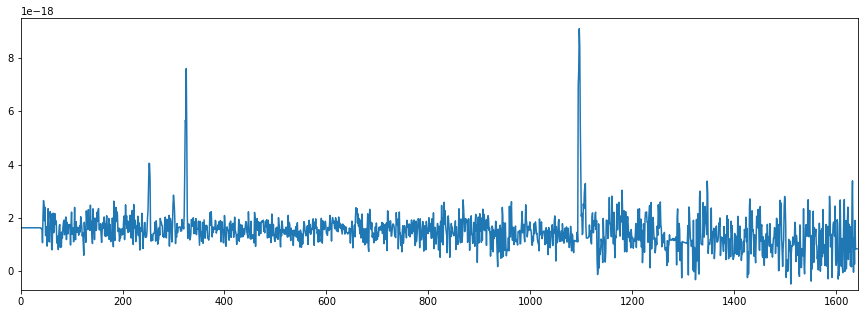

In [5]:
plt.figure(figsize=(15,5))
plt.xlim(data[0],len(data))
plt.ylim(-.7e-18,9.5e-18)
plt.plot(data) # Plotting flux data to take a quick look. 

In [6]:
manual

SIMPLE  =                    T / Java FITS: Wed Feb 28 14:35:12 HST 2018        
BITPIX  =                  -64                                                  
NAXIS   =                    1                                                  
NAXIS1  =                 1642                                                  
COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  
COMMENT and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H   
COMMENT and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H   
ORIGIN  = 'ESO     '           /  European Southern Observatory                 
DATE    = '2006-07-04T19:07:02.098' /  Date this file was written               
MJD-OBS =       53884.00244171 / MJD start (2006-05-29T00:03:30.964)            
DATE-OBS= '2006-05-29T00:03:30.963' /  Date of observation                      
EXPTIME =                3600. / Total sequence integration time                
TELESCOP= 'ESO-VLT-U3'      

---

# Creating The X Axis

##### To calculate the proper x axis in which it was measured we need to find the so called shift of the x axis...

The shift is $crpix_1$ $\cdot$ $cdelt_1$ where crpix is the reference pixel value in angstroms and cdelt is the step size in angstroms per data point

In [7]:
shift_x = manual['CRPIX1']*manual['CDELT1']
shift_x

2096.013

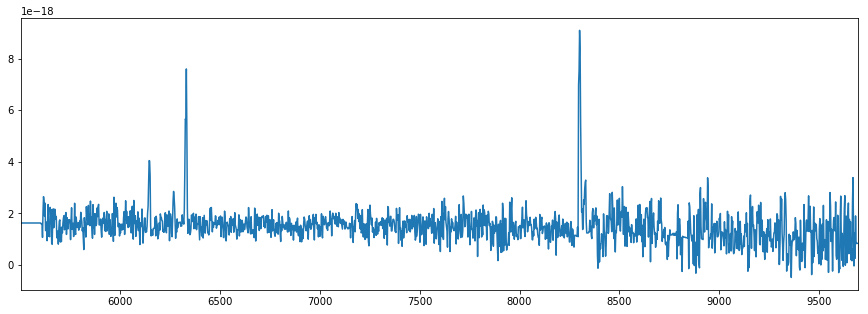

In [25]:
#np.arange(hdul[0].header['CRVAL1']-shift, data.shape[0]*hdul[0].header['CDELT1']+hdul[0].header['CRVAL1']-shift, hdul[0].header['CDELT1'])

x = np.arange(7598.57-shift_x,len(data) * 2.553+7598.57-shift_x,2.553)

plt.figure(figsize = (15, 5))
plt.xlim(x[0],x[-1])
plt.plot(x, data)

---
# Identifying Lines

## Part One:

This is my first attempt of identifying lines from just looking at them and comparing them visualy with other spectra of simalir sources (star forming regions). The method of verifying that we are correct with identifying our lines is done by calculating the redshift(z) and looking to see if we get a very similar value of z for each individual line. If we do get very close values for z then we know we have identified our lines correctly.  

**Note:** There is a couple of errors I made here in identification of lines. We will see that this is so when we later calculate the redshift of each individual line and notice we have some lines very close to a certain value (the correctly identified ones) and some that stray from the "global conscensus" of the redshift (the miss identified lines). The miss-identified lines are the two [SII] lines which are actually burried within the noise and are not able to be identified, the [OII] line which should be identified as $H\beta$, and $H\beta$ which should of been identfied as [OIII] at rest wavelength 4958.9.

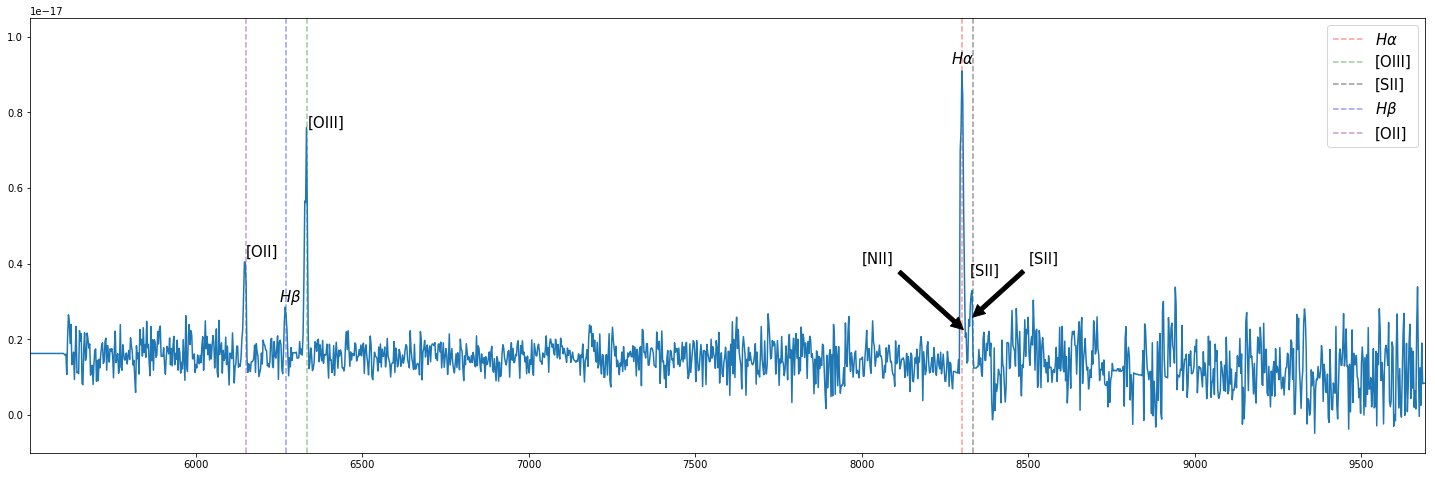

In [9]:
# Purpose of this assignment is to visually identify lines thus we will guess the line below is H-Alpha which is located at 1096 units

plt.figure(figsize=(25,8))

plt.axvline(x = 8301, color = 'red', label = r'$H\alpha$', ls = '--',alpha=0.4)
plt.axvline(x = 6335, color = 'green', label = '[OIII]', ls = '--',alpha=0.4)
plt.axvline(x = 8334, color = 'k', label = '[SII]', ls = '--',alpha=0.4)
plt.axvline(x = 6271, color = 'blue', label = r'$H\beta$', ls = '--',alpha=0.4)
plt.axvline(x = 6150, color = 'purple', label = '[OII]', ls = '--',alpha=0.4)

plt.annotate(r'$H\alpha$', xy=(8301,10e-18), xytext=(8268,9.3e-18), fontsize=15)
plt.annotate('[OIII]', xy=(6335,10e-18), xytext=(6335,7.6e-18), fontsize=15)
plt.annotate(r'$H\beta$', xy=(6271,10e-18), xytext=(6250,3e-18), fontsize=15)
plt.annotate('[OII]', xy=(6150,10e-18), xytext=(6150,4.2e-18), fontsize=15)
plt.annotate('[SII]', xy=(8334,10e-18), xytext=(8325,3.7e-18), fontsize=15)
plt.annotate('[NII]', xy=(8316, 2.17e-18), xytext=(8000,4e-18), arrowprops=dict(facecolor='black', shrink=0.05),fontsize=15)
plt.annotate('[SII]', xy=(8324, 2.517e-18), xytext=(8500,4e-18), arrowprops=dict(facecolor='black', shrink=0.05),fontsize=15)

plt.legend(fontsize=15)
plt.xlim(x[0],x[-1])
plt.ylim(-1e-18,10.5e-18)
plt.plot(x,data) # Plotting flux data to take a quick look. 

# Creating A Dataframe For Our Line Data

In [51]:
# Creating a function to calculate the redshift of a line due to the doppler effect 

def doppler_shift(rest_wavelength, shift_wavelength):
    
    shift = (shift_wavelength - rest_wavelength)/rest_wavelength
    
    return shift

In [45]:
# Index labels for dataframe
indexx = [
          "Rest Wavelength " r'$(Angstroms)$' ,
          'Central Wavelength ' r'$(Angstroms)$', 
          'Equivalent Widths ' r'$(Angstroms)$',
          "Redshift " r'$(Z)$'
         ] 

# Identified lines for the columns of our dataframe
identified_lines = [
                    '[OII]',
                    r'$H\beta$',
                    '[OIII]',
                    r'$H\alpha$',
                    '[NII]',
                    '[SII]',
                    '[SII]'
                   ]

# Rest wavelengths for dataframe and calculations obtained from research paper for the Orion nebula
rwl = [3726.03,4861.33,5006.84,6562.82,6583.41,6716.47,6730.85]

# Central wavelength that was calculated using Pyraf's splot feature with a gaussian fit for each line   
cwl = [6149.49, 6271.97, 6333.43, 8303.05, 8316.01, 8323.6, 8332.26]

# Equivalent width that was calculated using Pyraf's splot feature with a gaussian fit for each line   
eqw = [-25.82, -17.6, -40.54, -53.64, -0.837, -0.737, -5.767]

# Redshift values for identified lines 
redshift_z = []

for i in range(0,len(rwl)):
    z = doppler_shift(rwl[i],cwl[i]) 
    redshift_z.append(z)

In [46]:
# Creating a dataframe to place all of our calculated data for each individual Balmer line. 
df = pd.DataFrame(data=[rwl,cwl,eqw,redshift_z], index=indexx, columns=identified_lines)
df

,[OII],$H\beta$,[OIII],$H\alpha$,[NII],[SII],[SII]
Rest Wavelength $(Angstroms)$,3726.030000,4861.330000,5006.840000,6562.820000,6583.410000,6716.470000,6730.850000
Central Wavelength $(Angstroms)$,6149.490000,6271.970000,6333.430000,8303.050000,8316.010000,8323.600000,8332.260000
Equivalent Widths $(Angstroms)$,-25.820000,-17.600000,-40.540000,-53.640000,-0.837000,-0.737000,-5.767000
Redshift $(Z)$,0.650413,0.290176,0.264956,0.265165,0.263177,0.239282,0.237921


### Mean Redshift: 

Mean = $\sum \frac{x_{i}}{n}$

In [47]:
mean_z = sum(redshift_z)/len(redshift_z)
print('The mean redshift is:', mean_z)

The mean redshift is: 0.31586989068088517


# Identifying Lines
## Part 2:

As we can see above we do not have a mutual redshift value shared by all of the identfied lines thus we must do a closer look and try to re-identify some of them and then calculate the redshift again to see if we can get closer to a $z\approx$2.6 redshift. The reason we want to get closer to a z of this amount is because we should be fairly confident that we have identified $H\alpha$ correctly. 

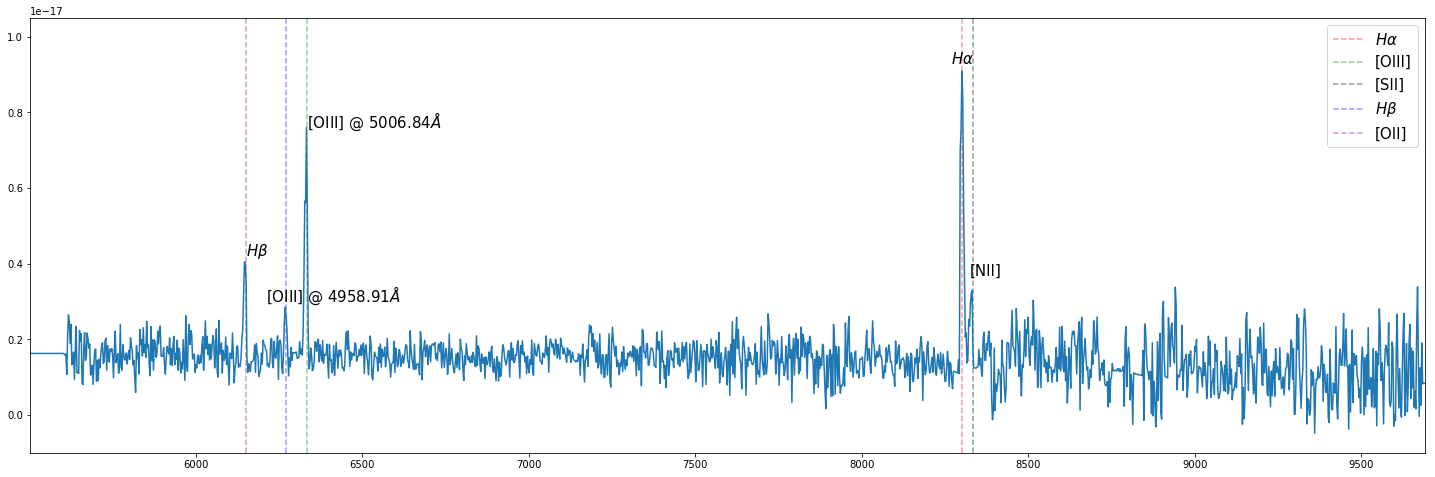

In [48]:
# Purpose of this assignment is to visually identify lines thus we will guess the line below is H-Alpha which is located at 1096 units

plt.figure(figsize=(25,8))

plt.axvline(x = 8301, color = 'red', label = r'$H\alpha$', ls = '--',alpha=0.4)
plt.axvline(x = 6335, color = 'green', label = '[OIII]', ls = '--',alpha=0.4)
plt.axvline(x = 8334, color = 'k', label = '[SII]', ls = '--',alpha=0.4)
plt.axvline(x = 6271, color = 'blue', label = r'$H\beta$', ls = '--',alpha=0.4)
plt.axvline(x = 6150, color = 'purple', label = '[OII]', ls = '--',alpha=0.4)

plt.annotate(r'$H\alpha$', xy=(8301,10e-18), xytext=(8268,9.3e-18), fontsize=15)
plt.annotate('[OIII] @ 5006.84$\AA$', xy=(6335,10e-18), xytext=(6335,7.6e-18), fontsize=15)
plt.annotate('[OIII] @ 4958.91$\AA$', xy=(6271,10e-18), xytext=(6210,3e-18), fontsize=15)
plt.annotate(r'$H\beta$', xy=(6150,10e-18), xytext=(6150,4.2e-18), fontsize=15)
plt.annotate('[NII]', xy=(8334,10e-18), xytext=(8325,3.7e-18), fontsize=15)

plt.legend(fontsize=15)
plt.xlim(x[0],x[-1])
plt.ylim(-1e-18,10.5e-18)
plt.plot(x,data) # Plotting flux data to take a quick look. 

**Note:** Viewing this plot we see we have a total of five lines identified this time rather than 7. Lets try and calculate the redshift for these lines and see if we come up with an approxmation of z close to 2.6. Below we will use our redshift equation and calculate the z of the now identfied lines and create another dataframe to nicely view the information. 

In [49]:
# Identified lines for the columns of our dataframe
identified_lines = [
                    r'$H\beta$',
                    '[OIII]',
                    '[OIII]',
                    r'$H\alpha$',
                    '[NII]',
                   ]

# Rest wavelengths for dataframe and calculations obtained from research paper for the Orion nebula
rwl = [4861.33, 4958.91, 5006.84, 6562.82, 6583.41]

# Central wavelength that was calculated using Pyraf's splot feature with a gaussian fit for each line   
cwl = [6149.48, 6272.03, 6333.42, 8303.38, 8330.68]

# Equivalent width that was calculated using Pyraf's splot feature with a gaussian fit for each line   
eqw = [ -26.45, -17.2, -41.85, -74.56, -16.5]

# Redshift values for identified lines 
redshift_z = []

for i in range(0,len(rwl)):
    z = doppler_shift(rwl[i],cwl[i]) 
    redshift_z.append(z)

# Creating a dataframe to place all of our calculated data for each individual Balmer line. 
df = pd.DataFrame(data=[rwl,cwl,eqw,redshift_z], index=indexx, columns=identified_lines)
df

,$H\beta$,[OIII],[OIII],$H\alpha$,[NII]
Rest Wavelength $(Angstroms)$,4861.330000,4958.9100,5006.840000,6562.820000,6583.410000
Central Wavelength $(Angstroms)$,6149.480000,6272.0300,6333.420000,8303.380000,8330.680000
Equivalent Widths $(Angstroms)$,-26.450000,-17.2000,-41.850000,-74.560000,-16.500000
Redshift $(Z)$,0.264979,0.2648,0.264954,0.265215,0.265405


### Mean Redshift: 

Mean = $\sum \frac{x_{i}}{n}$

In [50]:
mean_z = sum(redshift_z)/len(redshift_z)
print('The mean redshift is:', mean_z)

The mean redshift is: 0.26507057301369913


# Overall Take Away From The Visual Identification Method:

Thus we can now see that we have obtained a very close redshift of simialr value (z $\approx 2.6$) and therefor we can have a fair amount of confidence that we have now identified the lines correctly and thus have obtained accurate information within our dataframe. It is always best to find the more prevelent lines, such as $H\alpha$, and then build off of the information from that line as we did here. Again, we were able to identify $H\alpha as it is extremely prevellent in this type of spectra (star forming regions) and then use that lines information as a check which is what we did with the red shift.

---
---
---
---

# Alligning Our X Axis With An Identified Line Method

### Alligning Our X Axis With $H\alpha$ 

**Note (Very Important! This Method Is Incorrect):** We find here that the spectra is actually stretched in different regions thus we can not simply just allign our x axis with $H\alpha$. As you will find below when we allign the axis with $H\alpha$ none of the other lines end up were they should be found thus proving we can not use this method of line searching. Thus this is just a learning experience. Do not use this method to identify lines or to create the scale of your x axis!

---

#### Locating $H\alpha$ and Calculating The Starting Wavelength Of Our X Axis:  

1096 units is where we find h-alpha before adjusting for any shifting on the x axis (h-alpha is the 1096 data point). Thus we now need to find how many angstroms we traveled starting from zero units to get to it. 
 
Shift = $H\alpha_{Lab}-$[$H\alpha_{identified} \cdot$ Stepsize(Angstroms))



In [15]:
6562 - 1096 * manual['CDELT1']

3763.9120000000003

True

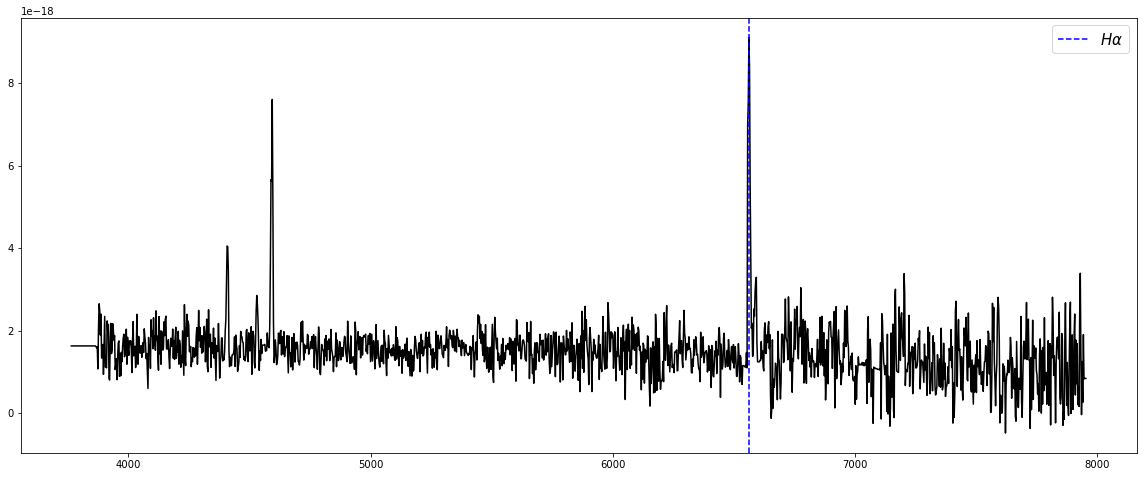

In [53]:
# Applying the starting wavelength to our x axis

# x = np.arange(above equation, len(data)*stepsize + above equation, step size)
x = np.arange(3764, len(data)*2.553+3764, 2.553)

plt.figure(figsize = (20, 8))
plt.plot(x, data, color='black')
plt.axvline(x = 6562, color = 'blue', label = r'$H\alpha$', ls = '--',alpha=1)
plt.legend(fontsize=15)

data.shape == x.shape # Verifies that we calculated the x axis correctly as it must be the same size as the y axis array

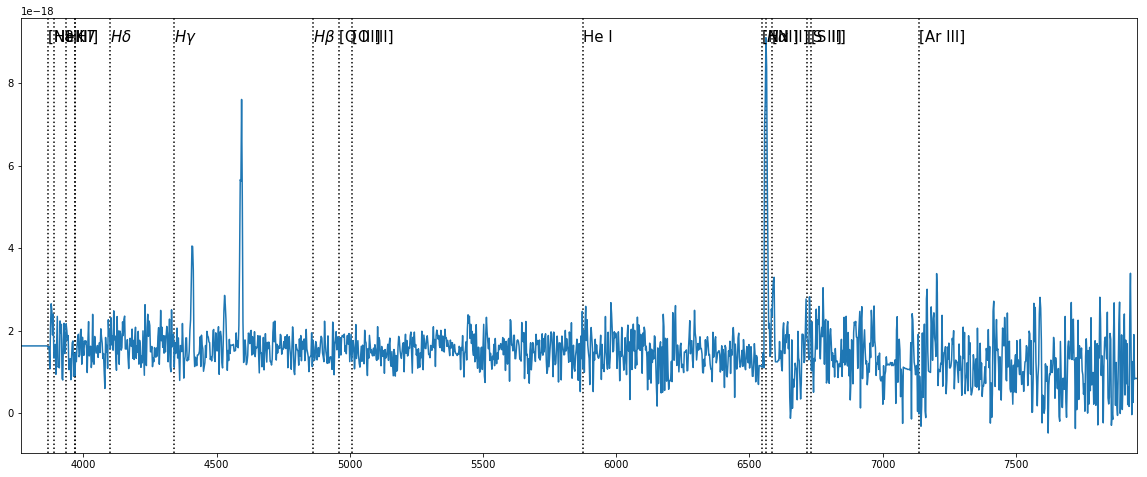

In [54]:
# Lines that are commanly be identifiable in a star forming type of galaxy
wave = [3868,3889,3933,3968,3970,4101,4340.5,4861,4958.8,5006.8,5875.6,6548,6562.8,6583.4,6716.5,6730,7135]

symbol = [
          '[Ne III]','H8','H','K','H7',r'$H\delta$',r'$H\gamma$',r'$H\beta$','[O III]',
          '[O III]','He I','[N II]',r'$H\alpha$','[N II]','[S II]','[S II]','[Ar III]'
         ]

# Plottling lines with annotations 
plt.figure(figsize=(20,8))

for i in range(len(symbol)):
    
    plt.axvline(x = wave[i], color = 'k', ls=':')
    plt.annotate(symbol[i], xy=(wave[i],9e-18), xytext=(wave[i],9e-18), fontsize=15)

plt.xlim(x[0],x[-1])    
plt.plot(x,data)
plt.show()

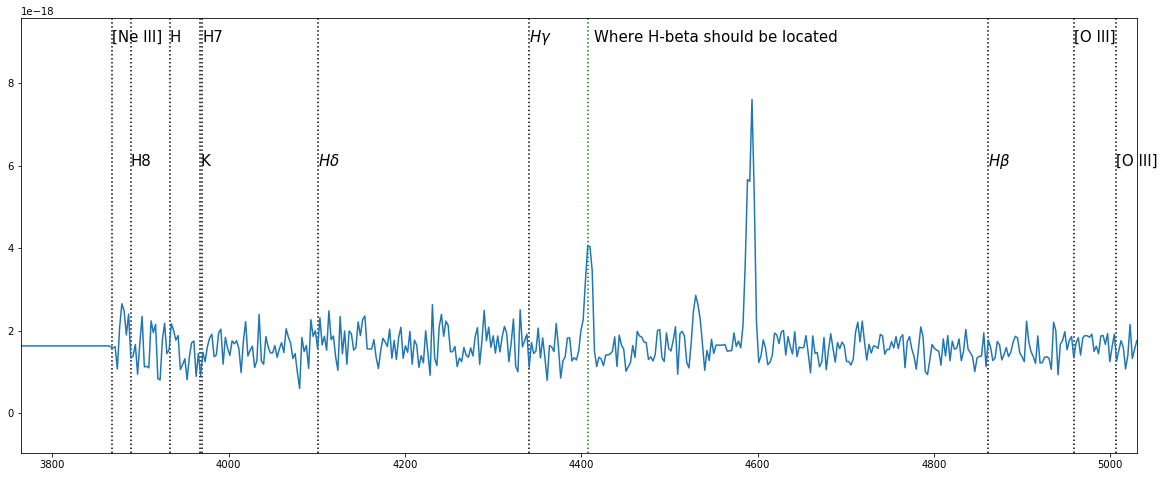

In [81]:
# lets take a closer look to see some of the lines more clearer... As we can see H-beta is nowhere close to where it should line up nor are the other lines

wave = [3868,3889,3933,3968,3970,4101,4340.5,4861,4958.8,5006.8]
wave_string = ['3868','3889','3933','3968','3970','4101','4340.5','4861','4958.8','5006.8']
symbol = ['[Ne III]','H8','H','K','H7',r'$H\delta$',r'$H\gamma$',r'$H\beta$','[O III]','[O III]']

plt.figure(figsize=(20,8))

for i in range(len(symbol)):
    
    #plt.axvline(x = wave[i], color = 'k', ls=':')
    #plt.annotate(symbol[i], xy=(wave[i],9e-18), xytext=(wave[i],9e-18), fontsize=15)
    
    if i in range(0,len(symbol),2):
        plt.axvline(x = wave[i], color = 'k', ls=':')
        plt.annotate(symbol[i], xy=(wave[i],9e-18), xytext=(wave[i],9e-18), fontsize=15)
    if i % 2 != 0:
        plt.axvline(x = wave[i], color = 'k', ls=':')
        plt.annotate(symbol[i], xy=(wave[i],6e-18), xytext=(wave[i],6e-18), fontsize=15)
        
plt.axvline(x = 4408, color = 'green', ls=':')
plt.annotate('Where H-beta should be located', xy=(4400,9e-18), xytext=(4415,9e-18), fontsize=15)
    
plt.xlim(3764,5030)    
plt.plot(x,data)

### Overall Outcome:

As we can see $H\beta$ is not anywhere close to where it should belocated, thus this method is not a viable option for idetnifying lines. One should aquire the knowledge to visualy be able to identify certain scientifically well known lines and then build upon the information you find out about those lines as we did previously when we found a red shift mean of $z=2.6$ which is very close to what we measured for the well know line of $H\alpha$.